In [1]:
import pandas as pd
import numpy as np

path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [2]:
df.to_csv('module_5_auto.csv')

In [3]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [4]:
%%capture
! pip install ipywidgets

In [5]:
from IPython.display import display
from IPython.html import widgets
from ipywidgets import interact, interactive, fixed, interact_manual

/home/manu/anaconda3/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [6]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width=12
    height=10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color='b', label=BlueName)
    
    plt.title(Title)
    plt.xlabel('Price ($)')
    plt.ylabel('Proportions of Cars')
    
    plt.show()
    plt.close()

In [7]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    width=12
    height=10
    plt.figure(figsize=(width, height))
    
    xmax = max([xtrain.values.max(), xtest.values.max()])
    
    xmin = min([xtrain.values.min(), xtest.values.min()])
    
    x = np.arange(xmin, xmax, 0.1)
    
    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [8]:
y_data = df['price']

In [9]:
x_data = df.drop('price', axis=1)

In [10]:
# randomlyu split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:", x_train.shape[0])

number of test samples: 31
number of training samples: 170


In [11]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

print("number of test samples:", x_test1.shape[0])
print("number of training samples:", x_train1.shape[0])

number of test samples: 81
number of training samples: 120


In [12]:
from sklearn.linear_model import LinearRegression


In [13]:
lre=LinearRegression()

In [14]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
lre.score(x_train[['horsepower']], y_train)

0.6449517437659684

In [16]:
lre.score(x_test[['horsepower']], y_test)

0.707688374146705

In [17]:
# cross-validation

from sklearn.model_selection import cross_val_score

In [18]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [19]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [20]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is", Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.29118394447560286


In [21]:
-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv=4, scoring='neg_mean_squared_error')

array([20254142.84026705, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [22]:
from sklearn.model_selection import cross_val_predict

In [23]:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [24]:
#  Overfitting, Underfitting and Model Selection
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([11927.70699817, 11236.71672034,  6436.91775515, 21890.22064982,
       16667.18254832])

In [26]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.16502418,  5914.48335385, 11243.76325987,  6662.03197043,
       15555.76936275])

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

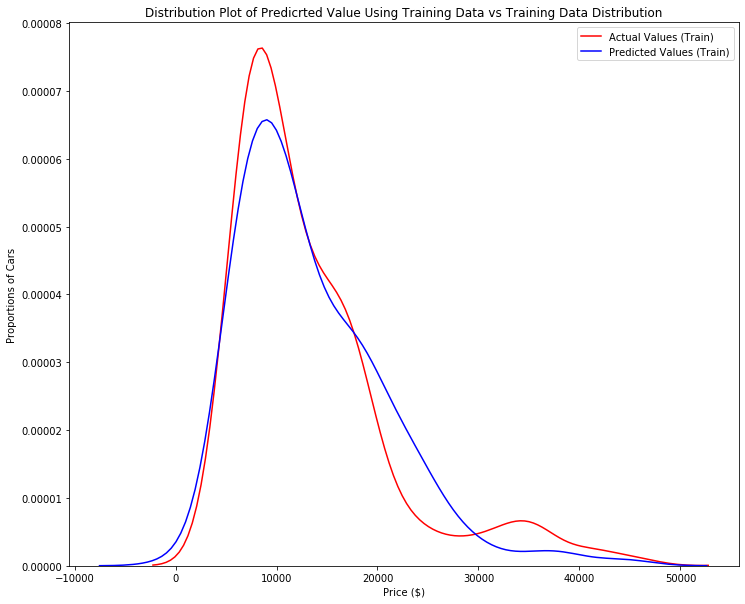

In [28]:
Title = 'Distribution Plot of Predicrted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)",Title)

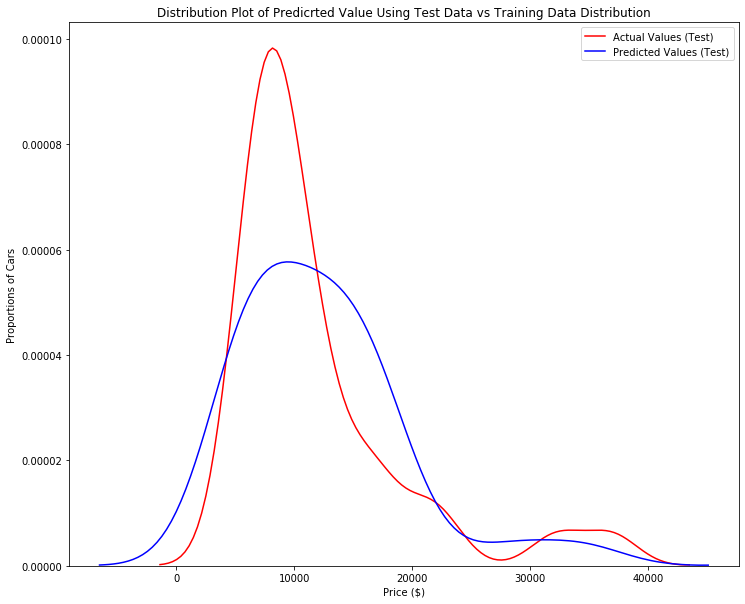

In [29]:
Title = 'Distribution Plot of Predicrted Value Using Test Data vs Training Data Distribution'
DistributionPlot(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)",Title)

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [32]:
pr =PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [33]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.77547414,  7308.09791963, 12213.83954918, 18893.06169793,
       19995.73194318])

In [35]:
print("Predicted:", yhat[0:4])
print('True: ', y_test[0:4].values)

Predicted: [ 6728.77547414  7308.09791963 12213.83954918 18893.06169793]
True:  [ 6295. 10698. 13860. 13499.]


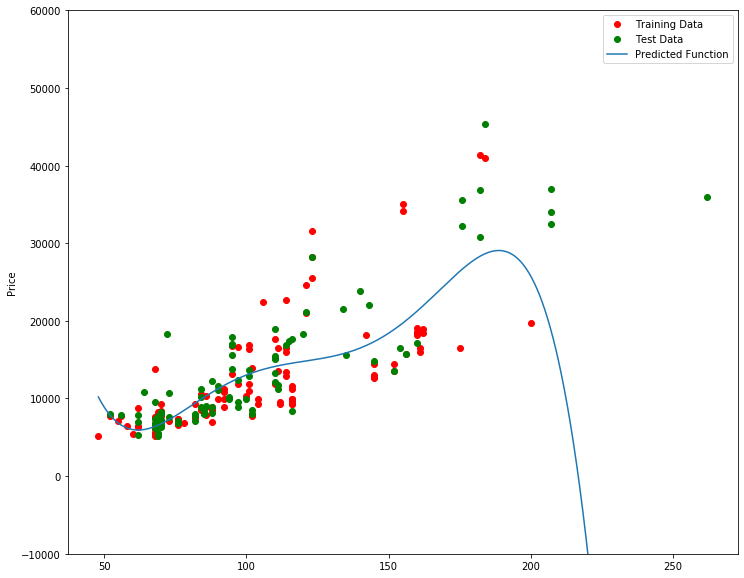

In [36]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

In [37]:
poly.score(x_train_pr, y_train)

0.5567716899771691

In [38]:
poly.score(x_test_pr, y_test)

-29.87184147296421

Text(3, 0.75, 'Maximum R^2')

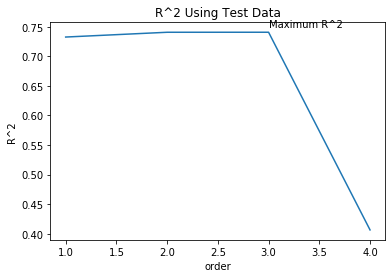

In [39]:
Rsqu_test=[]

order = [1,2,3,4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2')

In [40]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr= PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr, y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

In [41]:
interact(f, order=(0,6,1), test_data=(0.5, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.7, description='test…

<function __main__.f(order, test_data)>

In [44]:
# RIDGE Regression
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size','normalized-losses', 'symboling' ]])
X_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size','normalized-losses', 'symboling']])

In [45]:
from sklearn.linear_model import Ridge

In [48]:
RigeModel = Ridge(alpha=0.1)

In [49]:
RigeModel.fit(x_train_pr, y_train)

/home/manu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.03056e-16): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [50]:
yhat = RigeModel.predict(x_test_pr)

ValueError: shapes (91,5) and (21,) not aligned: 5 (dim 1) != 21 (dim 0)